# Downside Measures
Semi Deviation, VAR, and CVAR.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
hfi = erk.get_hfi_returns()

## Semideviation

In [3]:
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [4]:
# filter for returns less than 0
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [5]:
# confirm function
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

## VaR and CVaR
Value at Risk

- Historic VaR
- Parametric VaR; Gaussian
- Modified Cornish-Fisher VaR

### Historic VaR

In [6]:
np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [7]:
# using function
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

### Parametric VaR; Gaussian

In [8]:
# get z score
z = norm.ppf(0.05)

In [9]:
# calculating equation
-(hfi.mean() + z*hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [10]:
# using function
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

### Modified Cornish-Fisher VaR

In [11]:
erk.var_gaussian(hfi, modified=True)

Convertible Arbitrage    -0.087232
CTA Global                0.034571
Distressed Securities    -0.005987
Emerging Markets         -0.018288
Equity Market Neutral    -0.028568
Event Driven             -0.006270
Fixed Income Arbitrage   -0.087191
Global Macro              0.005675
Long/Short Equity         0.016688
Merger Arbitrage         -0.007418
Relative Value           -0.020930
Short Selling             0.032261
Funds Of Funds            0.001124
dtype: float64

### All VaRs

In [16]:
var_list = [erk.var_historic(hfi), erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified=True)]
comparison = pd.concat(var_list, axis=1)
comparison.columns = ['Historic', 'Gaussian', 'Cornish-Fisher']

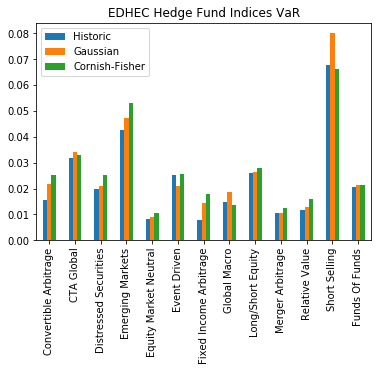

In [18]:
comparison.plot.bar(title='EDHEC Hedge Fund Indices VaR')

### BeyondVaR aka Conditional CVaR

In [21]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64